In [1]:
import pandas as pd

In [2]:
from btnlp_lib import SentimentAnalyzer

/home/wolfingten/.python_environments/ML/lib/python3.11/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/wolfingten/.python_environments/ML/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/wolfingten/.python_environments/ML/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/wolfingten/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
train_df = pd.read_csv(
    "../data/twitter_training.csv",
    names=["ID", "platform", "sentiment", "comment"],
    na_values=["<unk>"],
    dtype={"comment": str},
)
valid_df = pd.read_csv(
    "../data/twitter_validation.csv",
    names=["ID", "platform", "sentiment", "comment"],
    na_values=["<unk>"],
    dtype={"comment": str},
)

In [4]:
analyzer = SentimentAnalyzer(train_df, valid_df)

      ID     platform sentiment  \
0   2401  Borderlands  Positive   
6   2402  Borderlands  Positive   
12  2403  Borderlands   Neutral   
18  2404  Borderlands  Positive   
24  2405  Borderlands  Negative   

                                              comment  
0   im getting on borderlands and i will murder yo...  
6   So I spent a few hours making something for fu...  
12  Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...  
18  that was the first borderlands session in a lo...  
24  the biggest dissappoinment in my life came out...  
                 ID
count  12447.000000
mean    6432.586165
std     3740.553090
min        1.000000
25%     3195.500000
50%     6422.000000
75%     9600.500000
max    13200.000000


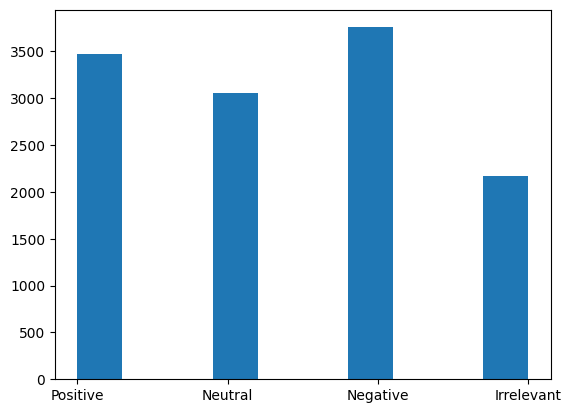

In [5]:
analyzer.summarize("sentiment")

In [6]:
analyzer.numerize_labels("sentiment")

In [7]:

analyzer.tokenize("comment")

tokenizing column comment

train df:



100%|██████████| 10282/10282 [00:13<00:00, 738.20it/s]


validation df: 



100%|██████████| 828/828 [00:01<00:00, 560.51it/s]


In [8]:
analyzer.vader_sentiment("comment_tokenized")

              precision    recall  f1-score   support

          -1       0.47      0.33      0.39       265
           0       0.34      0.47      0.40       285
           1       0.55      0.51      0.53       277

    accuracy                           0.44       827
   macro avg       0.46      0.43      0.44       827
weighted avg       0.45      0.44      0.44       827



array([[ 87, 143,  35],
       [ 72, 133,  80],
       [ 26, 110, 141]])

In [9]:
analyzer.textblob_sentiment("comment_tokenized")

              precision    recall  f1-score   support

          -1       0.52      0.13      0.21       265
           0       0.36      0.82      0.50       285
           1       0.60      0.23      0.33       277

    accuracy                           0.40       827
   macro avg       0.49      0.39      0.34       827
weighted avg       0.49      0.40      0.35       827



array([[ 34, 219,  12],
       [ 21, 234,  30],
       [ 11, 203,  63]])

In [10]:
analyzer.huggingface_sentiment("comment_tokenized")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 827/827 [00:32<00:00, 25.73it/s]


              precision    recall  f1-score   support

          -1       0.58      0.76      0.66       265
           0       0.57      0.39      0.46       285
           1       0.68      0.71      0.69       277

    accuracy                           0.61       827
   macro avg       0.61      0.62      0.60       827
weighted avg       0.61      0.61      0.60       827



array([[201,  46,  18],
       [ 99, 110,  76],
       [ 44,  36, 197]])

In [11]:
view_df = analyzer.valid_df
view_df.head()

,ID,platform,sentiment,comment,sentiment_numerized,comment_tokenized,vader_sentiment,textblob_sentiment,huggingface_sentiment
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,0,bbc news amazon boss jeff bezos rejects claims...,0,0,0
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,-1,user pay word functions poorly samsungus chrom...,0,0,-1
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",-1,csgo matchmaking full closet hacking truly awf...,0,0,-1
4,4433,Google,Neutral,Now the President is slapping Americans in the...,0,president slapping americans face really commi...,0,0,-1
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,-1,hi eahelp ive madeleine mccann cellar past 13 ...,0,0,-1


In [12]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
config.label2id

{'negative': 0, 'neutral': 1, 'positive': 2}